In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv("/Users/arupdas/Downloads/house-prices-advanced-regression-techniques/train.csv", na_values='NA')
df.head()
df['Alley'].fillna('No alley access', inplace=True)
df['Fence'].fillna('No fence', inplace=True)
df['FireplaceQu'].fillna('No fireplace', inplace=True)
df['PoolQC'].fillna('No pool', inplace=True)
df['MiscFeature'].fillna('None', inplace=True)
df['GarageType'].fillna('No garage', inplace=True)
df['GarageFinish'].fillna('No garage', inplace=True)
df['GarageQual'].fillna('No garage', inplace=True)
df['GarageCond'].fillna('No garage', inplace=True)
df['BsmtQual'].fillna('No basement', inplace=True)
df['BsmtCond'].fillna('No basement', inplace=True)
df['BsmtExposure'].fillna('No basement', inplace=True)
df['BsmtFinType1'].fillna('No basement', inplace=True)
df['BsmtFinType2'].fillna('No basement', inplace=True)
df['MasVnrType'].fillna('None', inplace=True)


/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/1944905349.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alley'].fillna('No alley access', inplace=True)
/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/1944905349.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [3]:
df["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [4]:
subclass_data = df.groupby("MSSubClass")["SalePrice"].mean().reset_index()
subclass_data

,MSSubClass,SalePrice
0,20,185224.811567
1,30,95829.724638
2,40,156125.000000
3,45,108591.666667
4,50,143302.972222
5,60,239948.501672
6,70,166772.416667
7,75,192437.500000
8,80,169736.551724
9,85,147810.000000


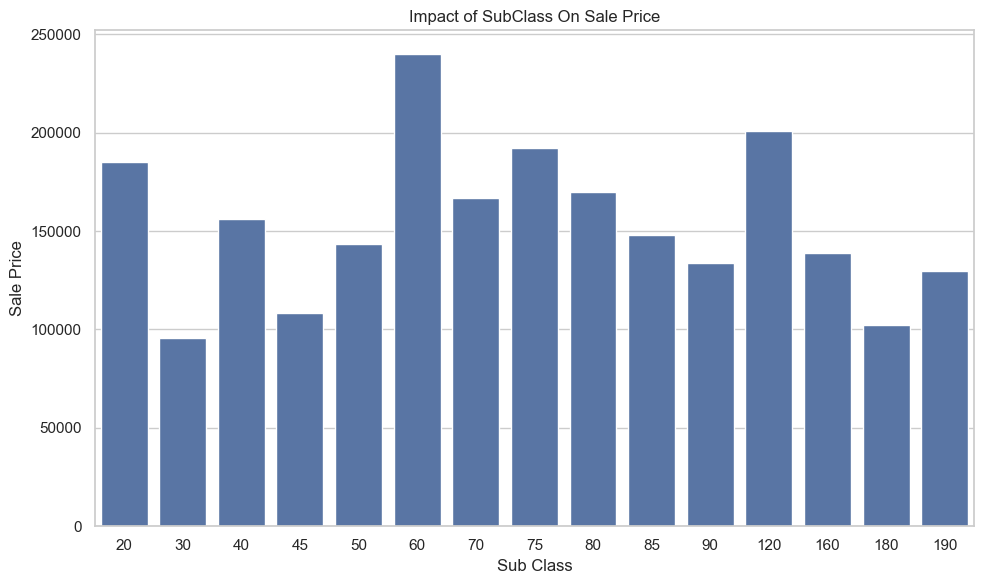

In [5]:
sns.set(style="whitegrid")

plt.figure(figsize = (10, 6))
sns.barplot(x="MSSubClass", y="SalePrice", data=subclass_data)

plt.title("Impact of SubClass On Sale Price")
plt.xlabel("Sub Class")
plt.ylabel("Sale Price")

plt.tight_layout()
plt.show()

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/950420599.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MSZoning", y="SalePrice", data=mszoning_data, palette="viridis")


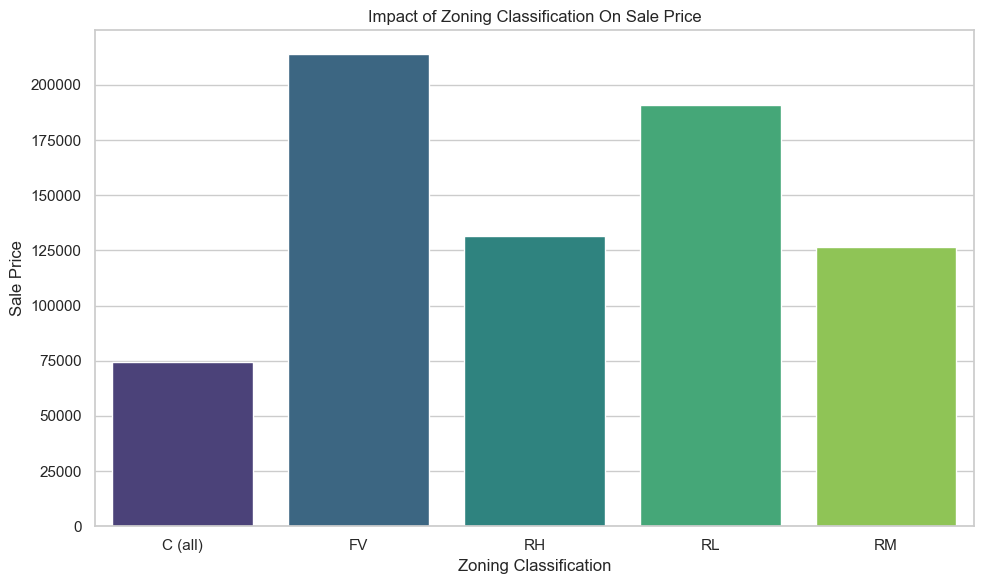

In [6]:
mszoning_data = df.groupby("MSZoning")["SalePrice"].mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize = (10, 6))
sns.barplot(x="MSZoning", y="SalePrice", data=mszoning_data, palette="viridis")

plt.title("Impact of Zoning Classification On Sale Price")
plt.xlabel("Zoning Classification")
plt.ylabel("Sale Price")

plt.tight_layout()
plt.show()

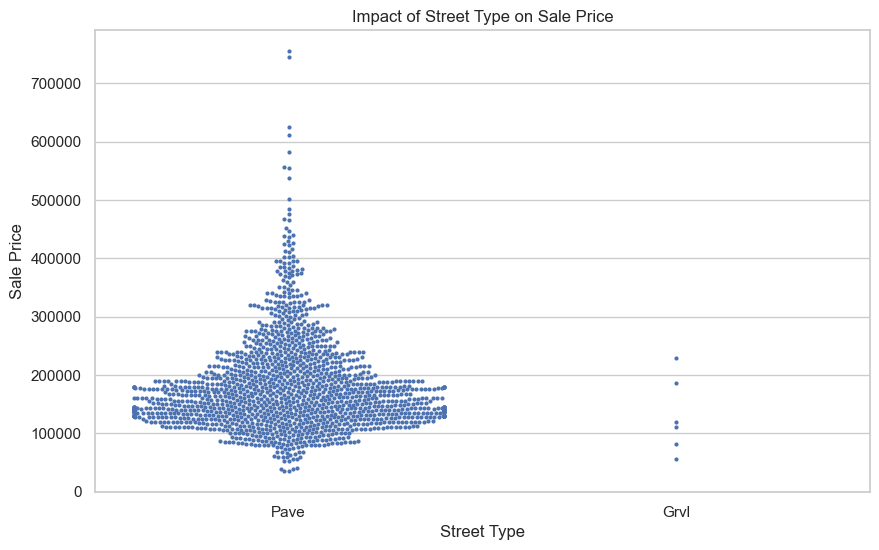

In [7]:
plt.figure(figsize = (10, 6))
sns.swarmplot(x='Street', y='SalePrice', data=df, size=3)
plt.title('Impact of Street Type on Sale Price')
plt.xlabel('Street Type')
plt.ylabel('Sale Price')

# Show the plot
plt.show()

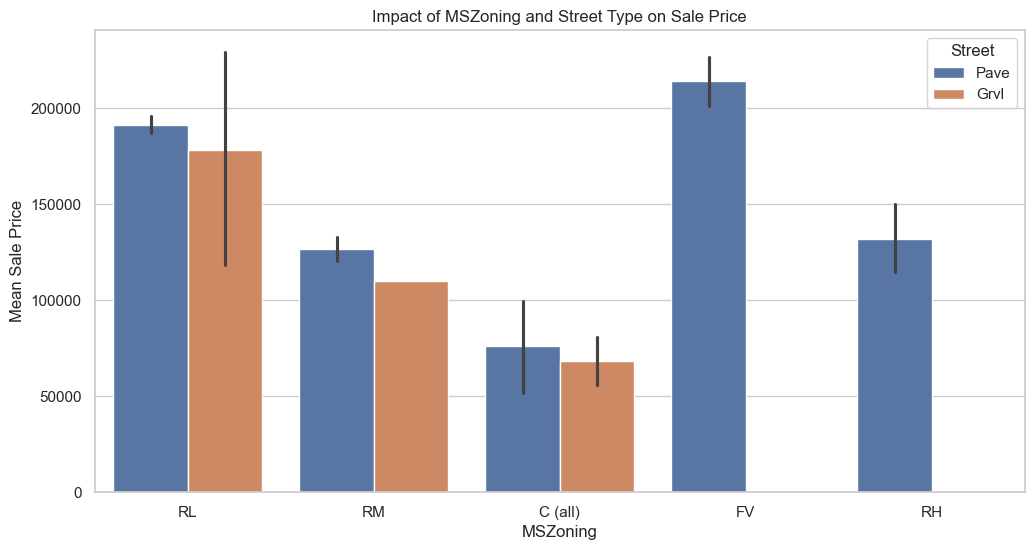

In [8]:
plt.figure(figsize=(12,6))

sns.barplot(x="MSZoning", y="SalePrice", hue="Street", data=df)
plt.title('Impact of MSZoning and Street Type on Sale Price')
plt.xlabel('MSZoning')
plt.ylabel('Mean Sale Price')

# Show the plot
plt.show()

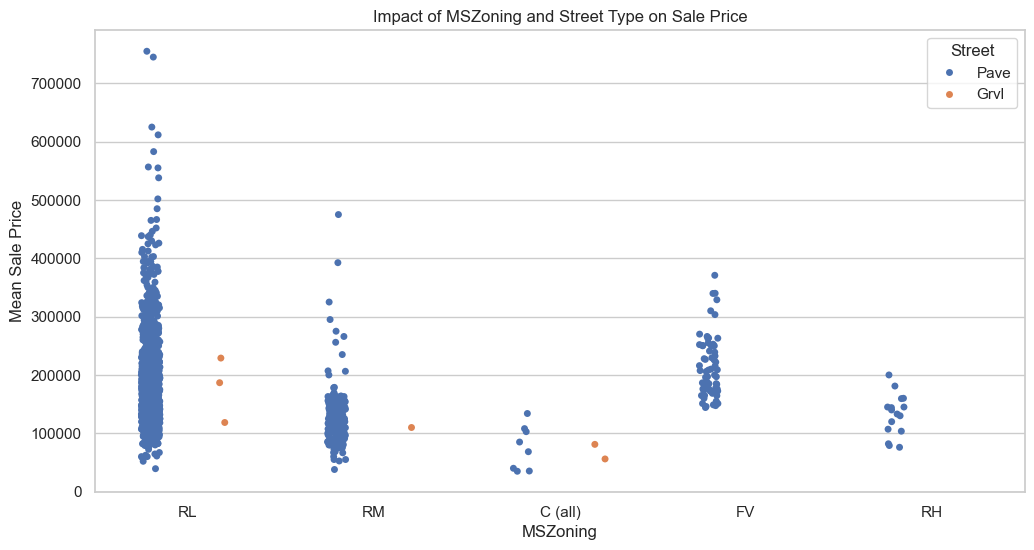

In [9]:
plt.figure(figsize=(12,6))

sns.stripplot(x="MSZoning", y="SalePrice", hue="Street", data=df, jitter=True, dodge=True)
plt.title('Impact of MSZoning and Street Type on Sale Price')
plt.xlabel('MSZoning')
plt.ylabel('Mean Sale Price')

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

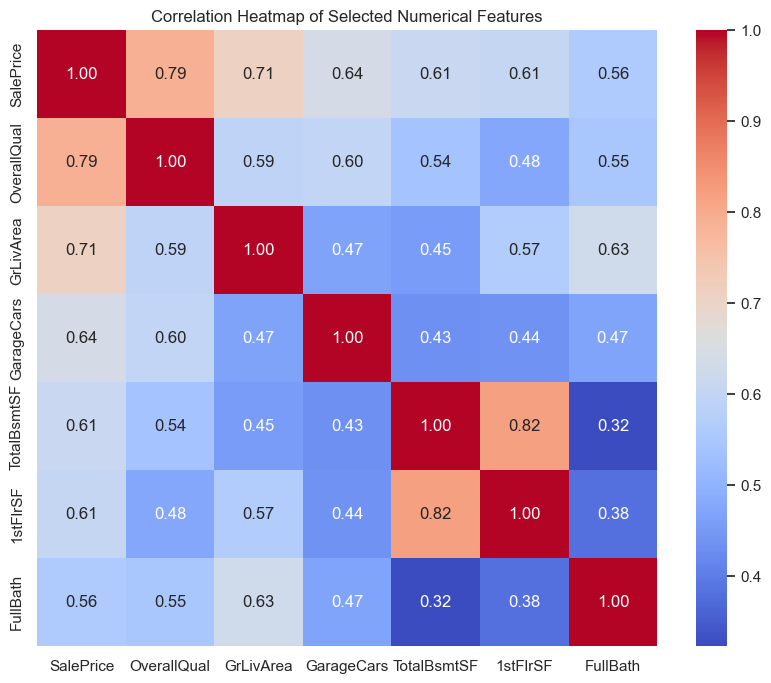

In [11]:
numerical_columns = df.select_dtypes(include=["int64", "float64"])

corr = numerical_columns.corr()

plt.figure(figsize=(12,6))

selected_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath']

# Calculate the correlation matrix for the selected features
corr_subset = df[selected_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with annotations and reduce precision
sns.heatmap(corr_subset, cmap="coolwarm", annot=True, fmt=".2f")

plt.title('Correlation Heatmap of Selected Numerical Features')
plt.show()

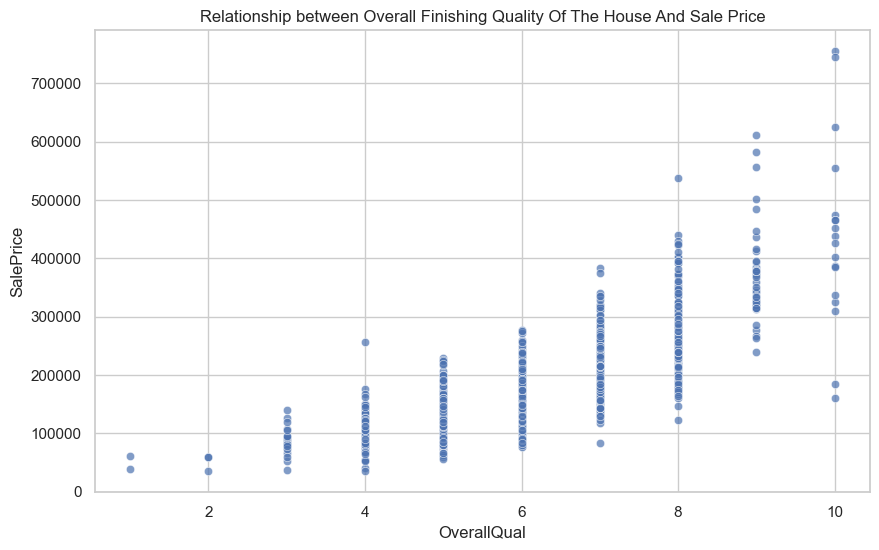

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="OverallQual", y="SalePrice", data=df, alpha=0.7)
plt.title("Relationship between Overall Finishing Quality Of The House And Sale Price")
plt.show()

<Figure size 1200x600 with 0 Axes>

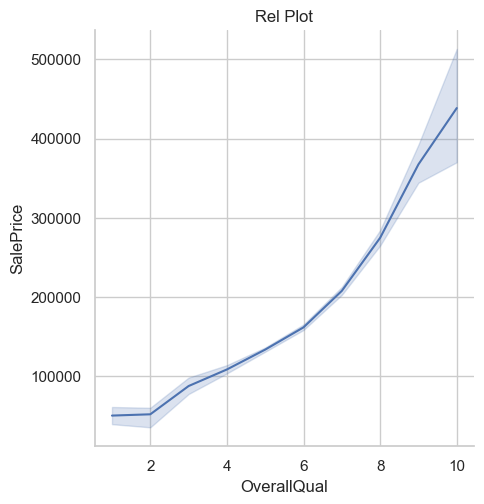

In [16]:
plt.figure(figsize=(12,6))
sns.relplot(x="OverallQual", y="SalePrice", data=df, kind="line")
plt.title("Rel Plot")
plt.show()

In [33]:
from sklearn.impute import SimpleImputer
numerical_imputer = SimpleImputer(strategy="mean")
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = numerical_imputer.fit_transform(df[numerical_features])

categorical_imputer = SimpleImputer(strategy="most_frequent")
categorical_features = df.select_dtypes(include=['object']).columns

df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,12.0,2008.0,WD,Normal,250000.0


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X=df.drop('SalePrice', axis=1)
y = df['SalePrice']


categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', 'passthrough', numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

model = Pipeline([
    ('preprocessor', preprocessor),  # preprocess data
    ('regression', LinearRegression())  # Linear Regression model
])


model.fit(X,y)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', '...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('regression', LinearRegression())])

In [47]:
XTest = pd.read_csv("/Users/arupdas/Downloads/house-prices-advanced-regression-techniques/train.csv")

X_test = XTest.drop('SalePrice', axis=1)

categorical_imputer = SimpleImputer(strategy="most_frequent")
numerical_imputer = SimpleImputer(strategy="mean")
categorical_features = X_test.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

X_test[categorical_features] = categorical_imputer.fit_transform(X_test[categorical_features])
X_test[numerical_features] = numerical_imputer.fit_transform(X_test[numerical_features])
Y_test = XTest['SalePrice']

print(Y_test.head())
predictions = model.predict(X_test.head())
print('Predictions:', predictions)


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
Predictions: [211109.10755444 199257.36161073 211726.73838662 187674.40079306
 303593.92324701]


/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


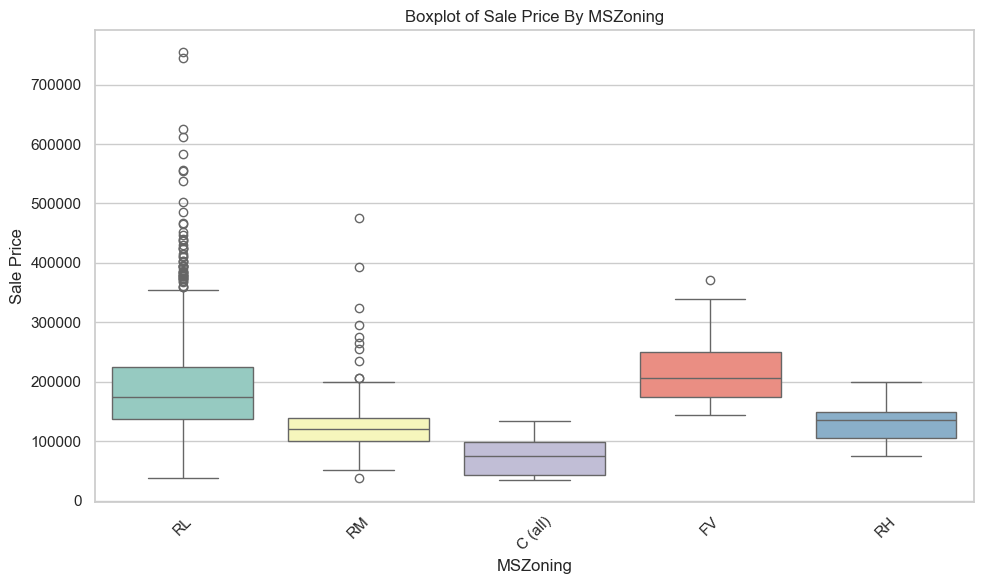

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


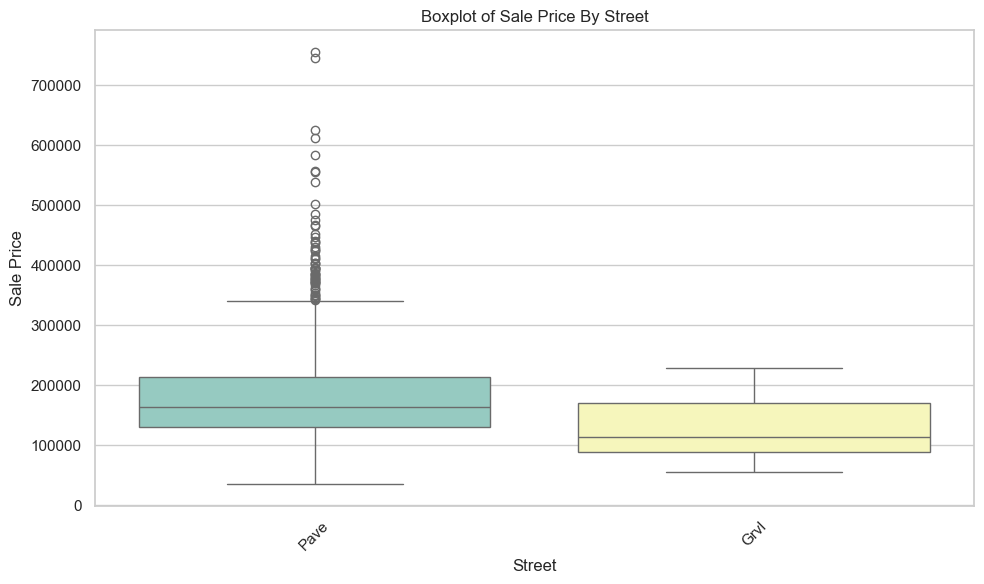

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


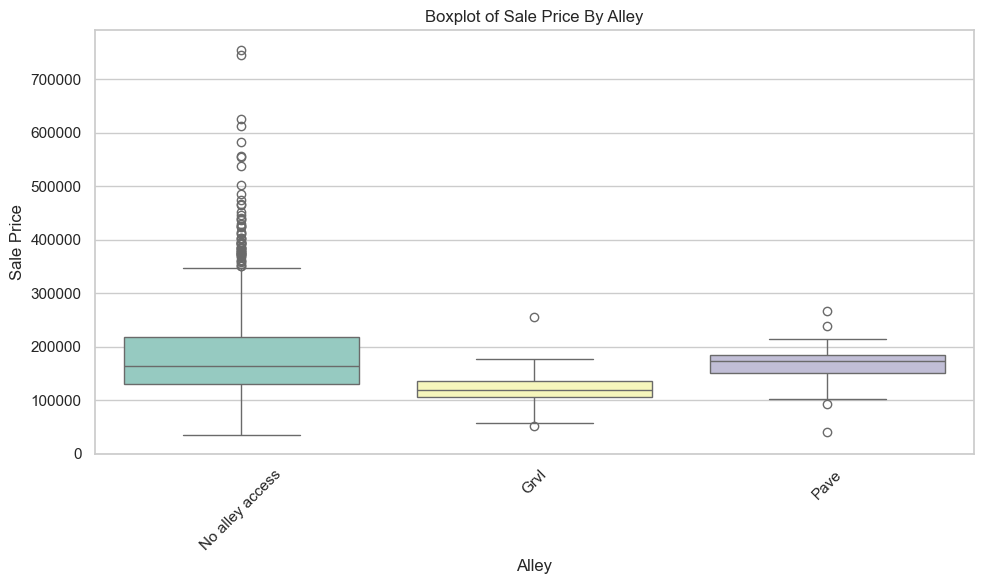

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


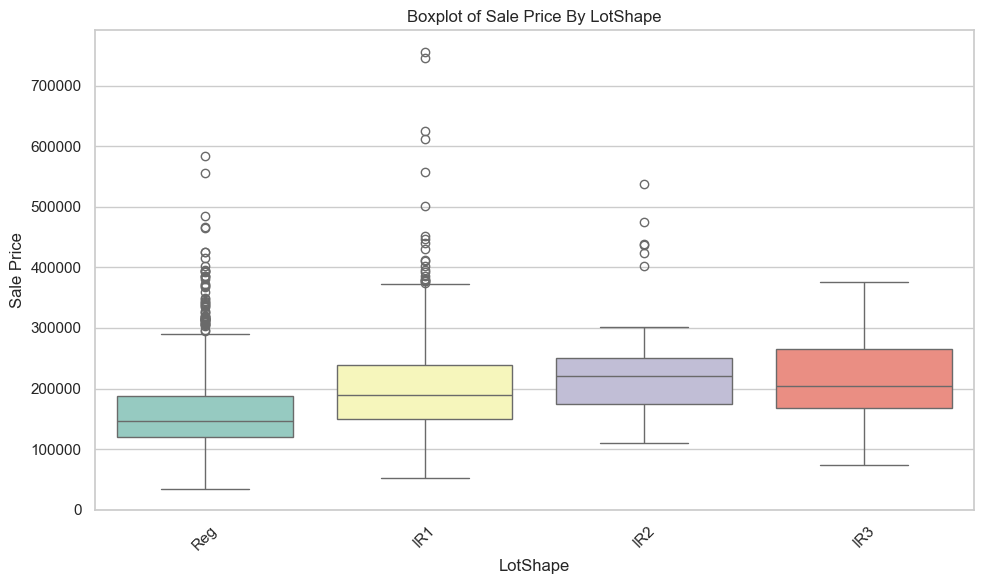

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


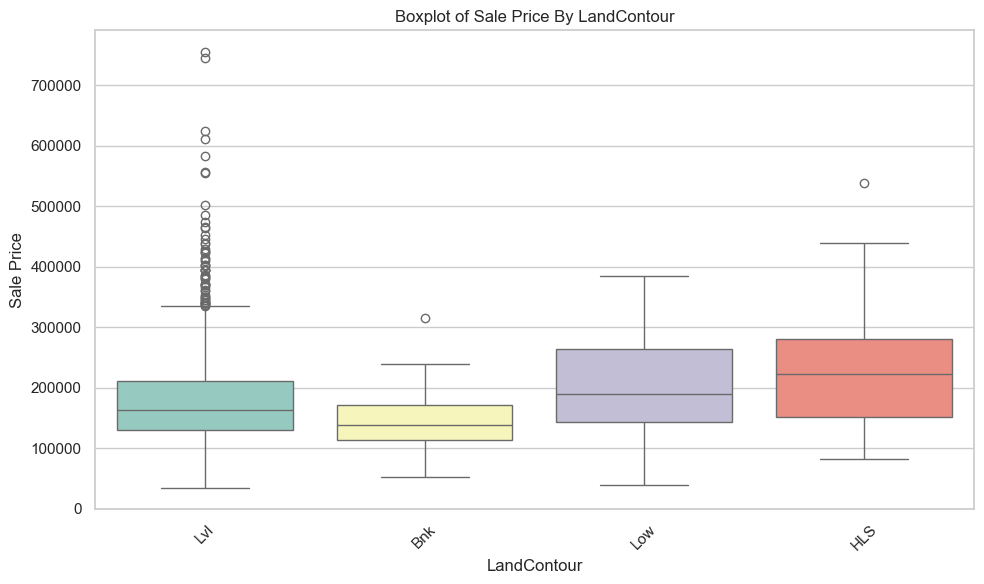

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


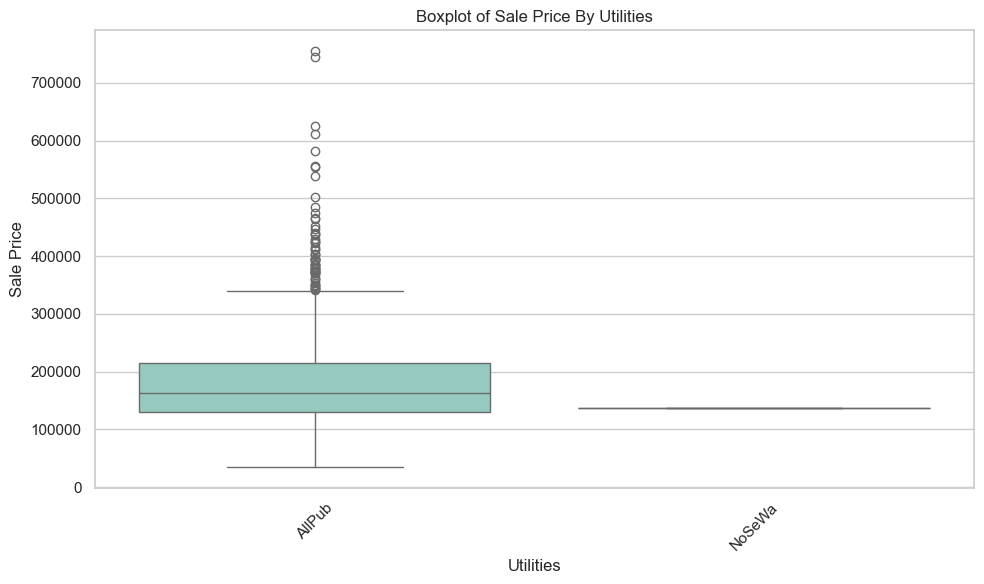

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


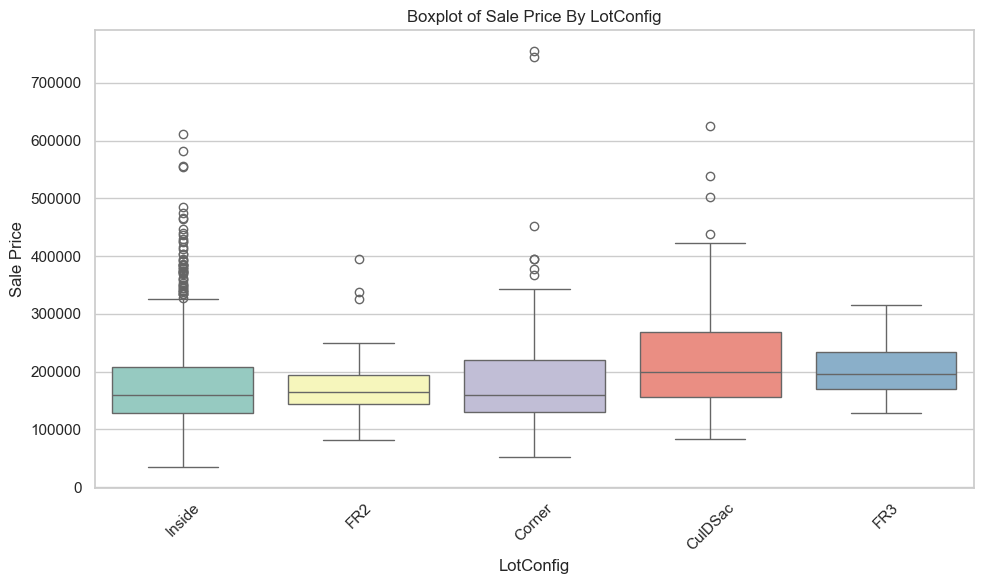

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


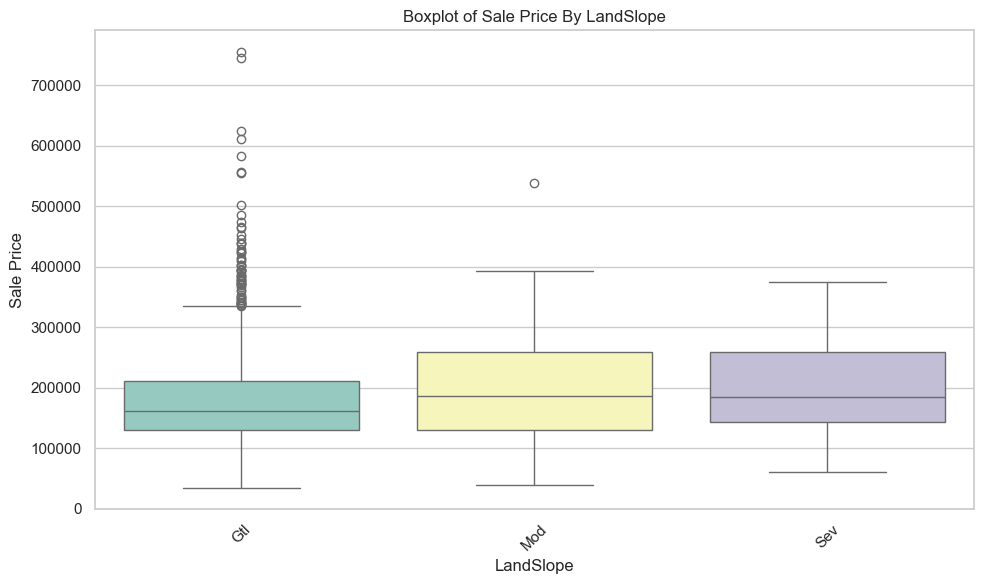

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


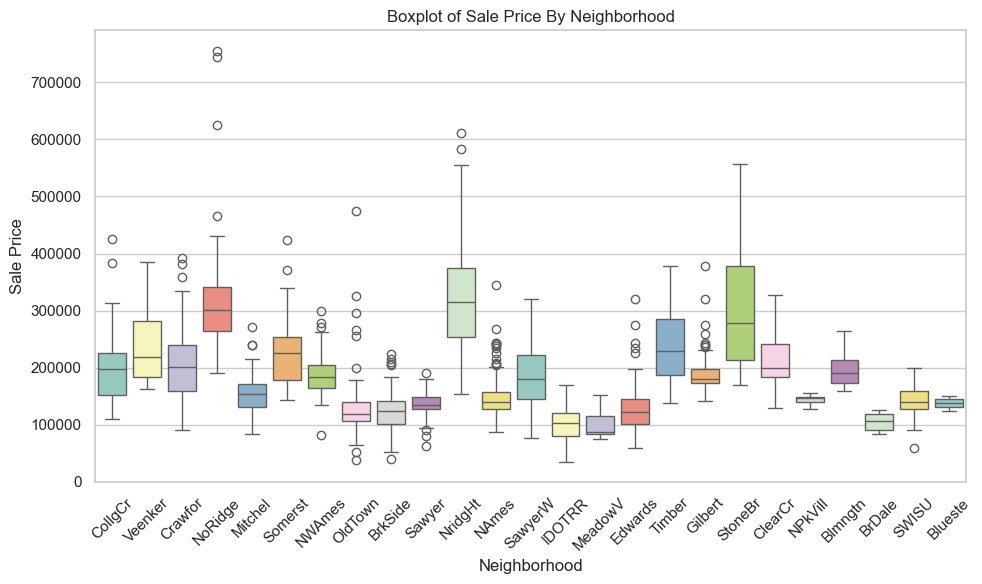

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


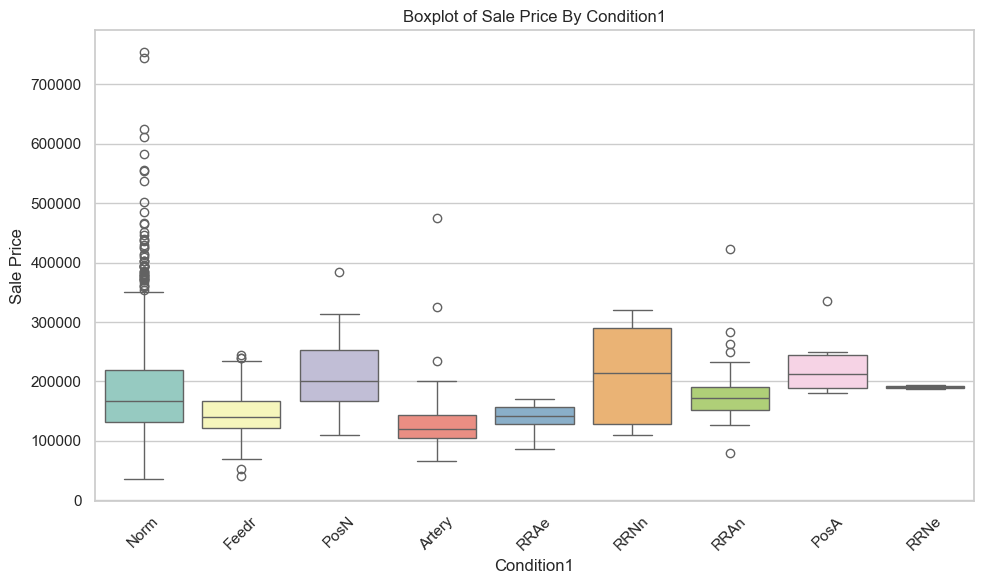

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


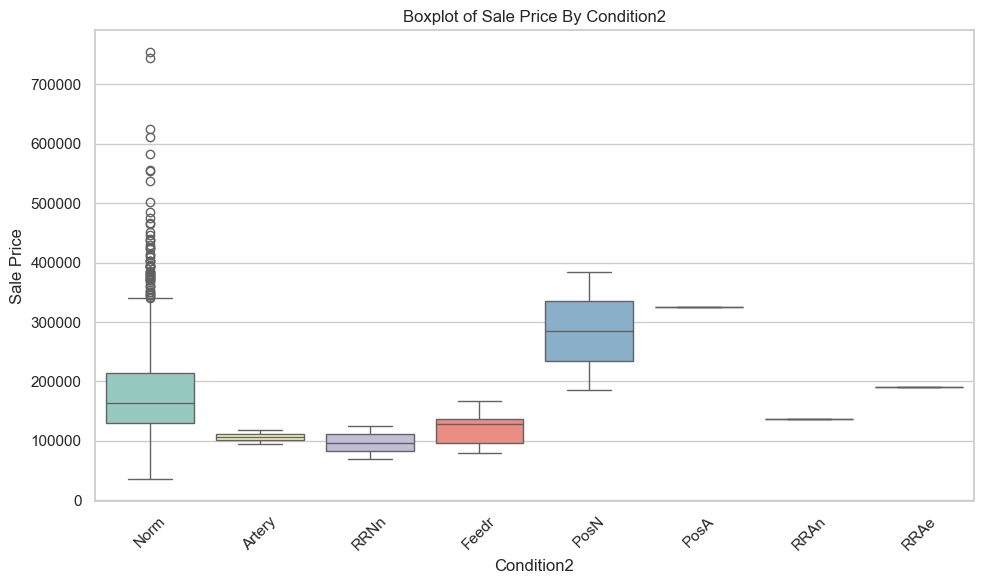

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


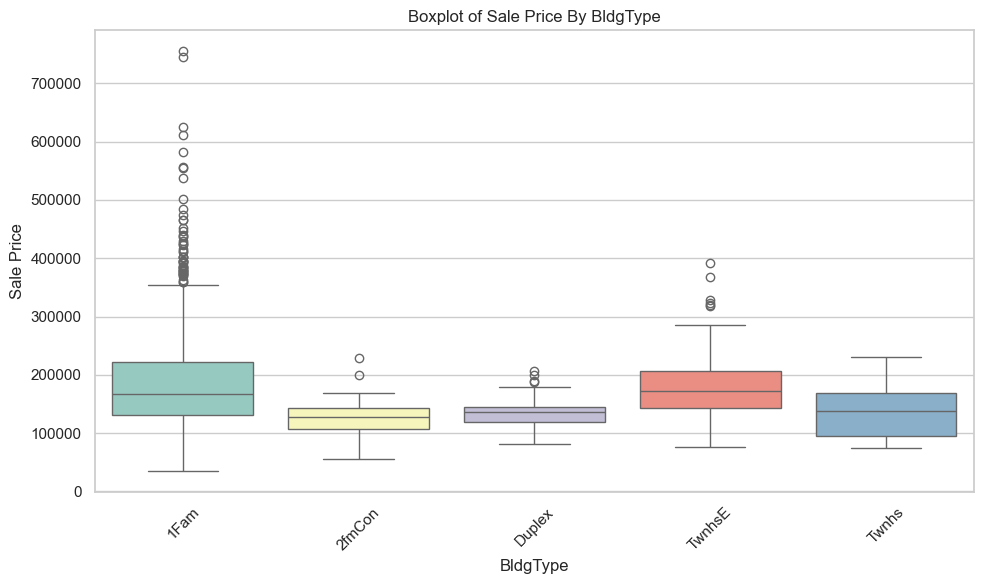

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


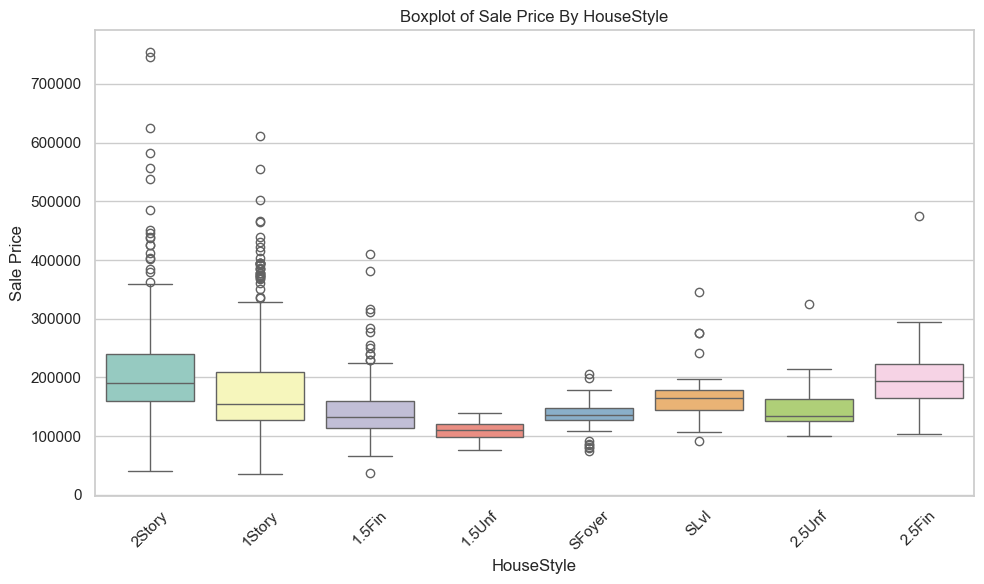

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


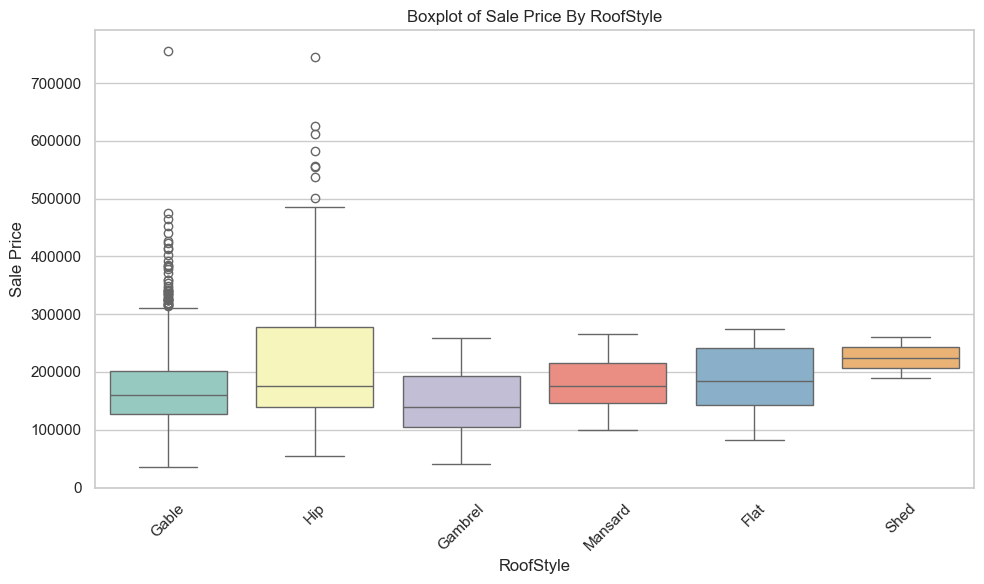

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


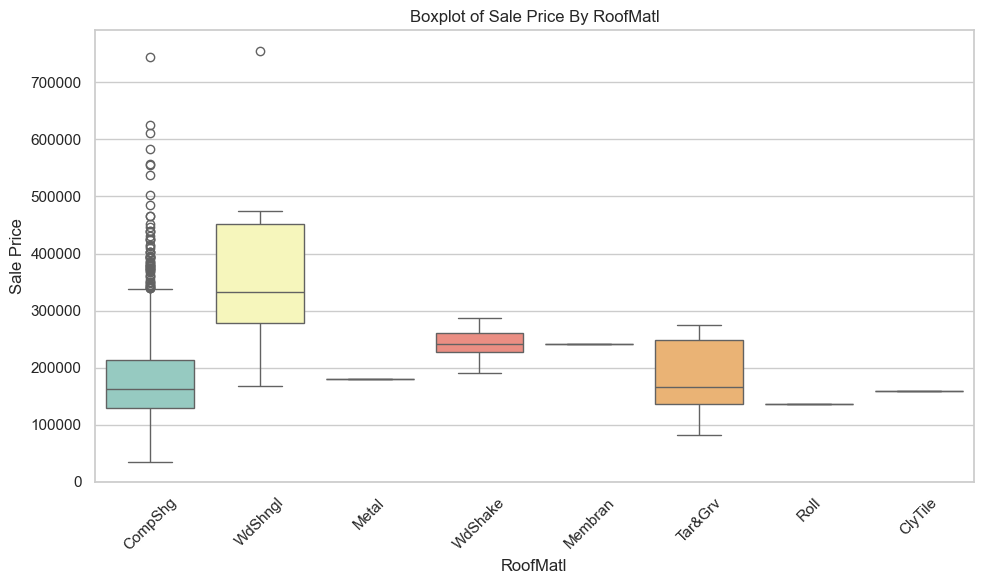

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


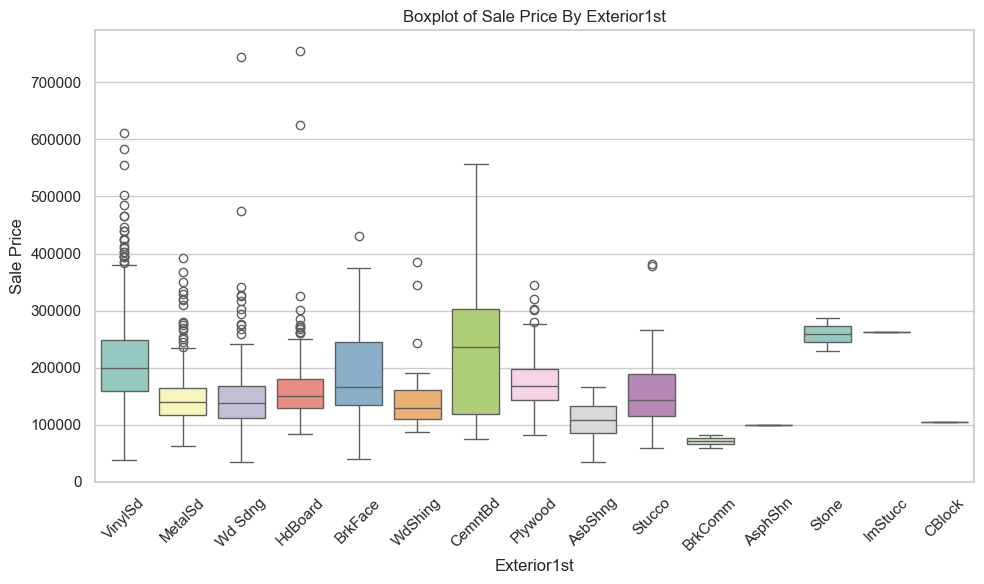

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


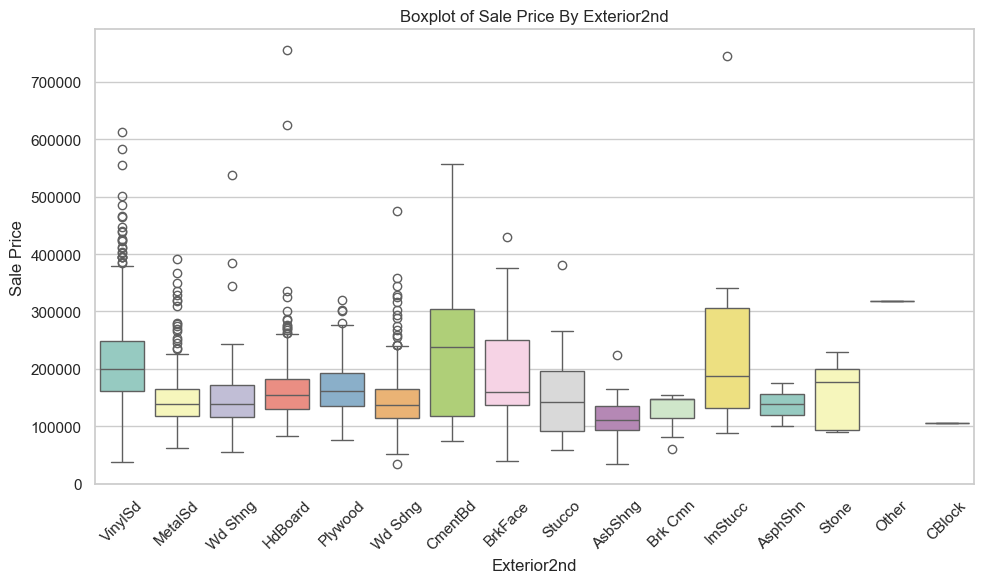

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


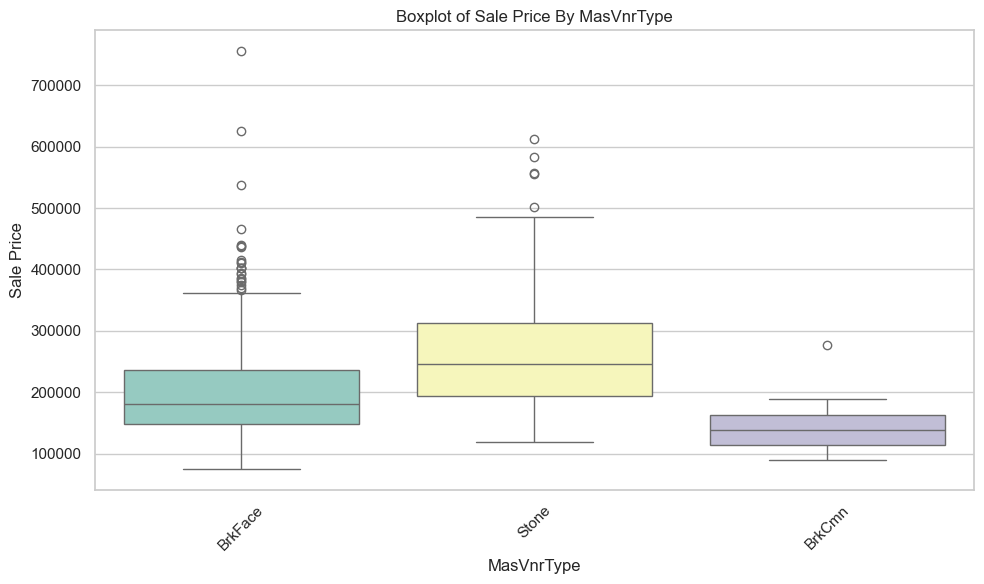

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


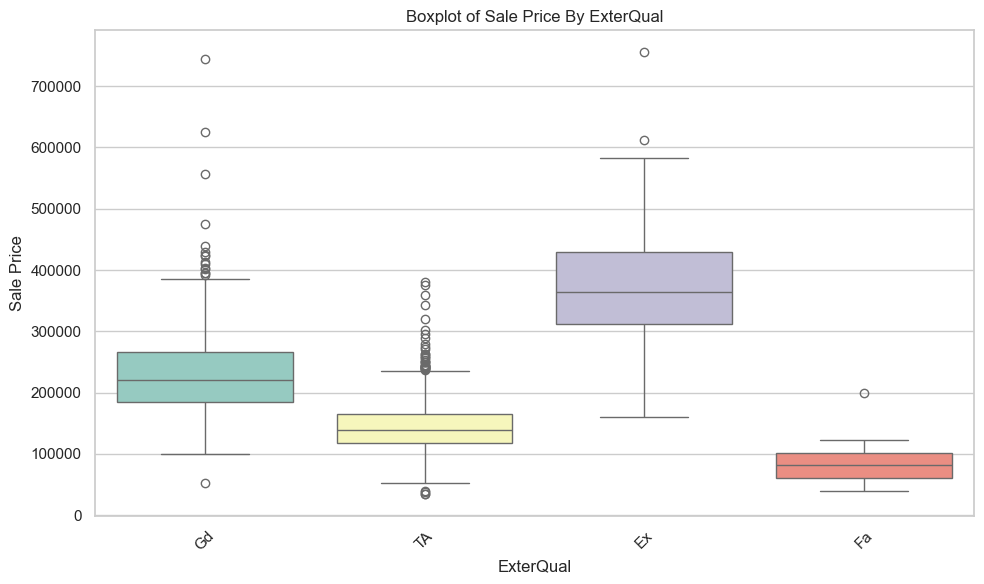

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


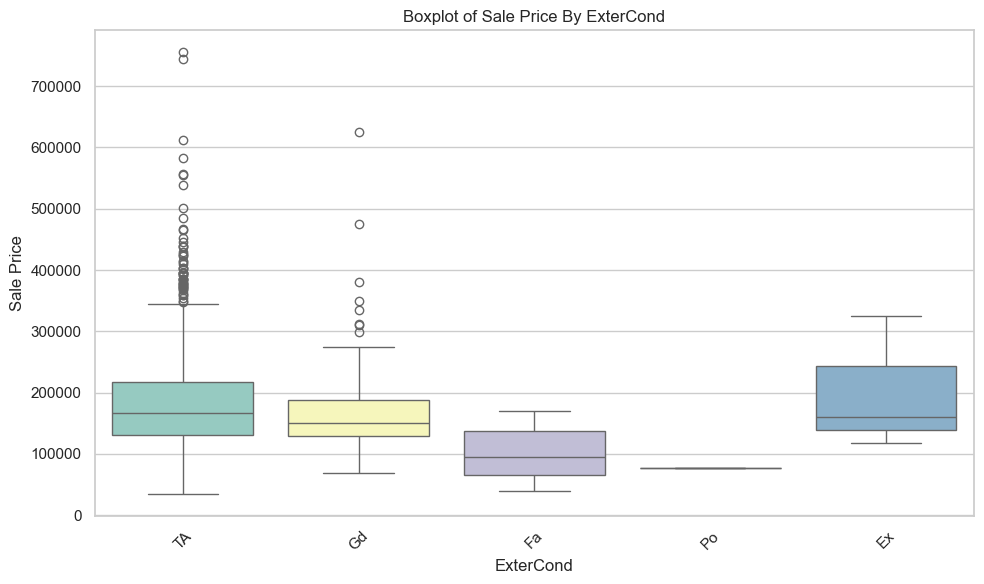

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


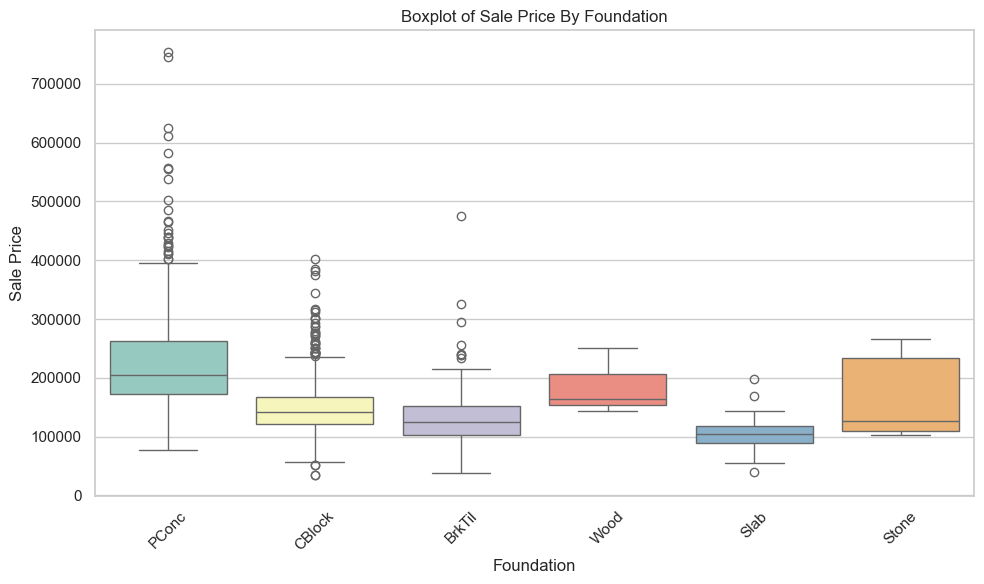

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


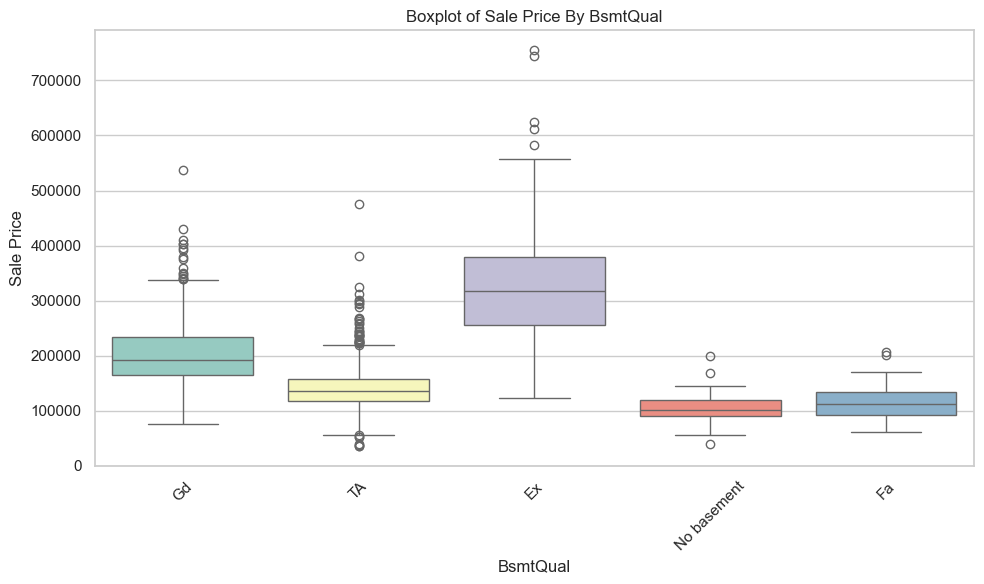

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


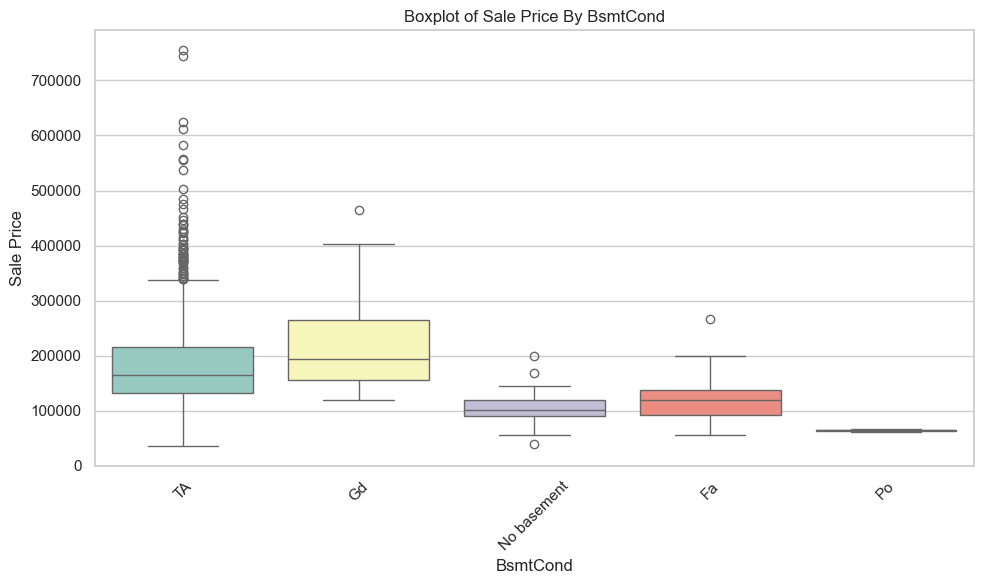

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


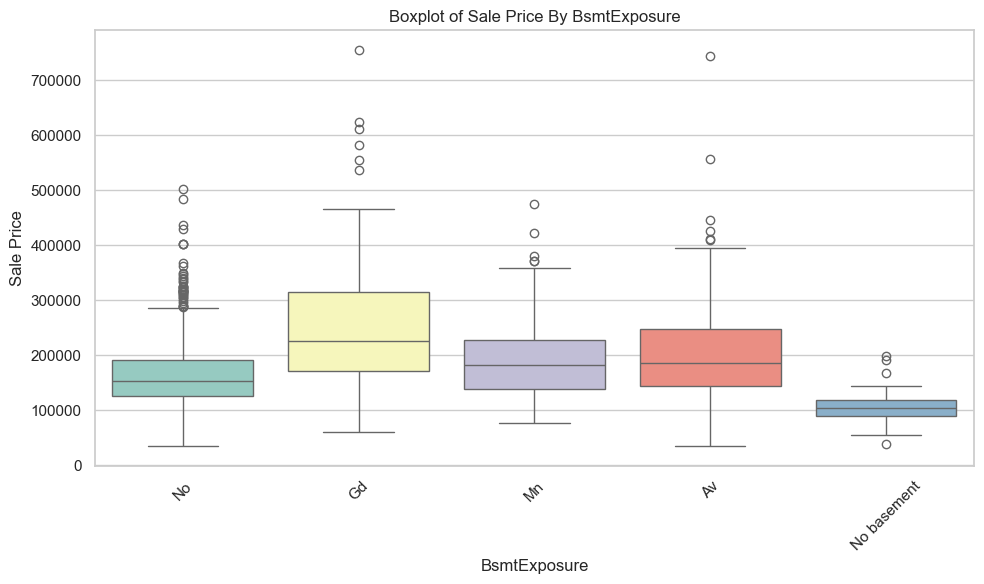

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


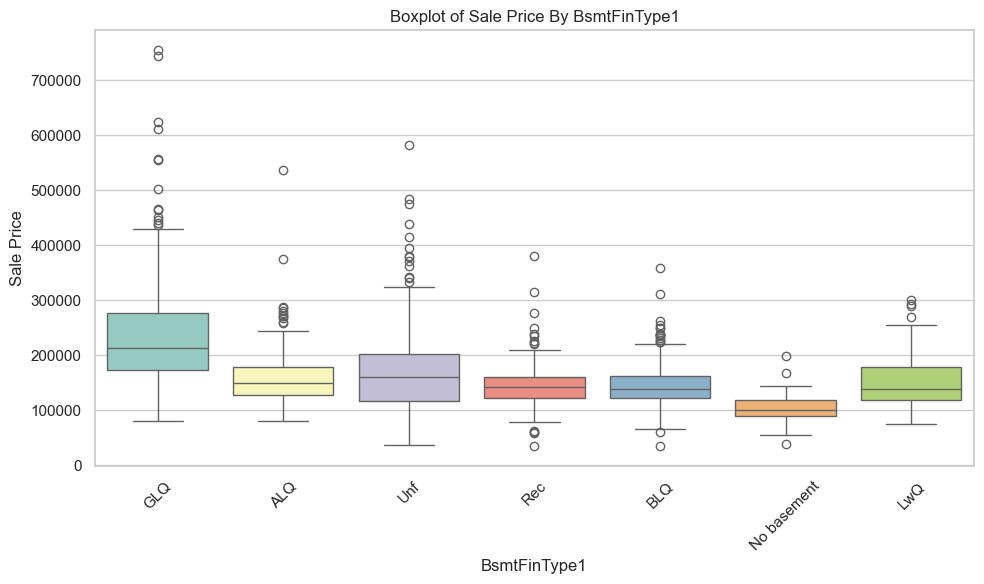

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


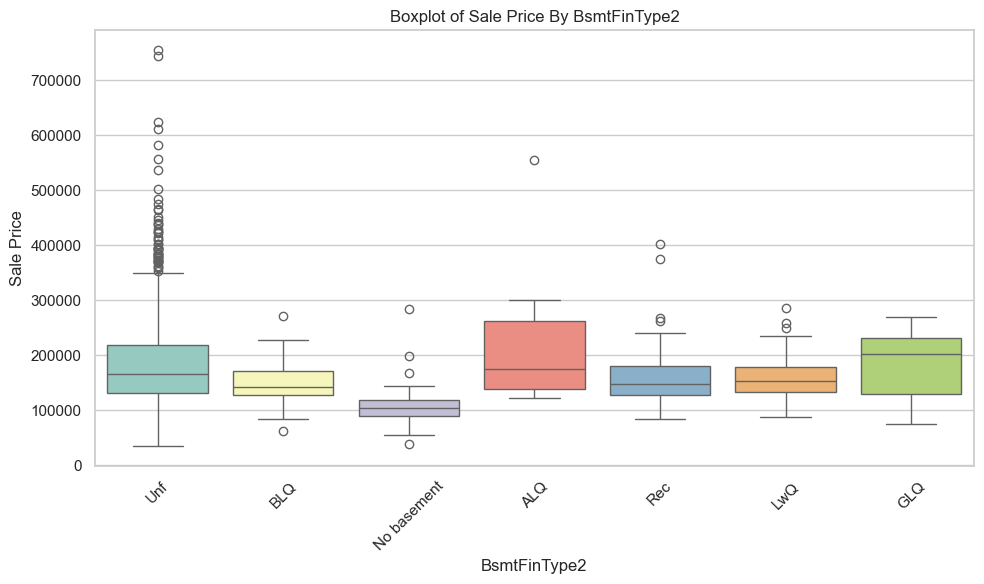

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


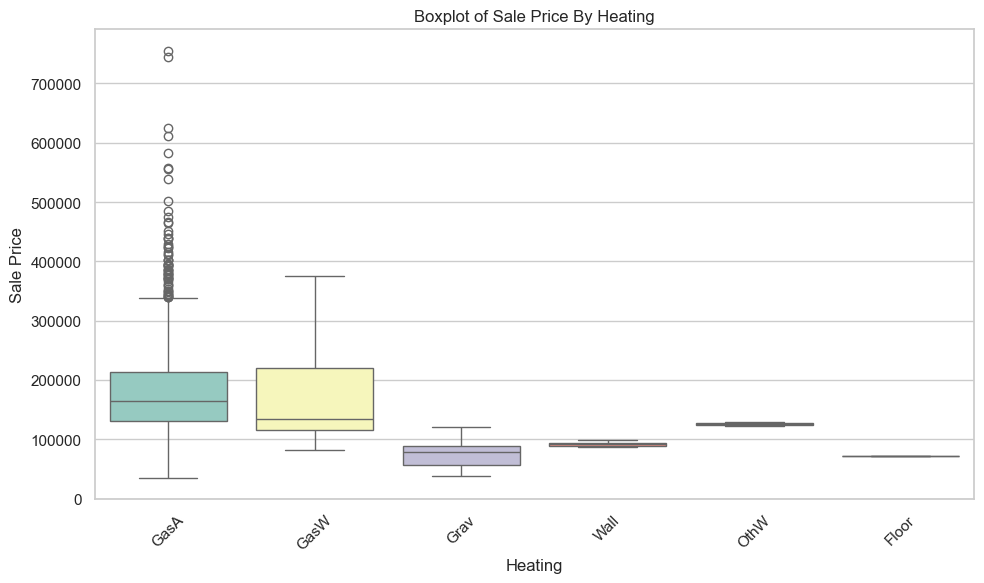

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


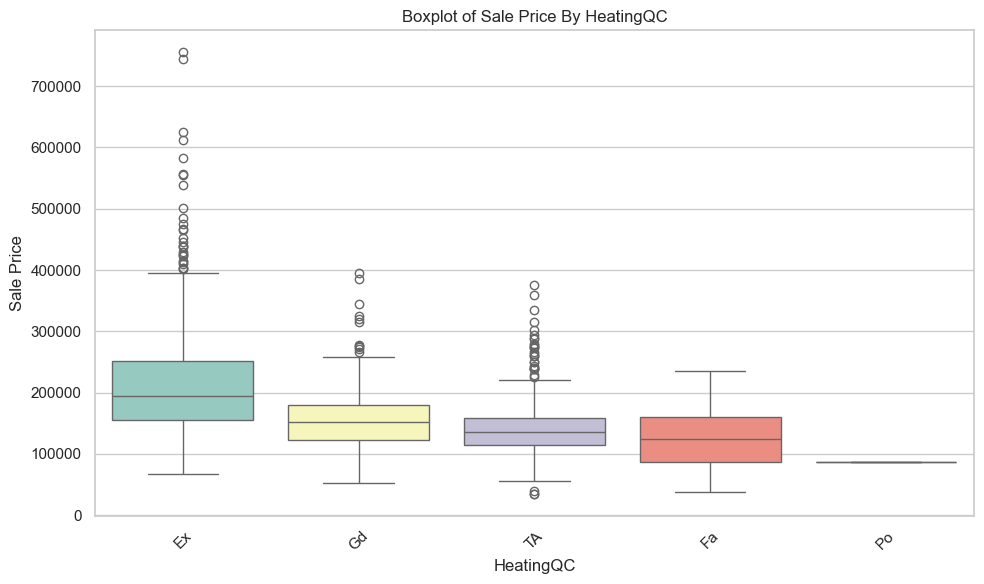

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


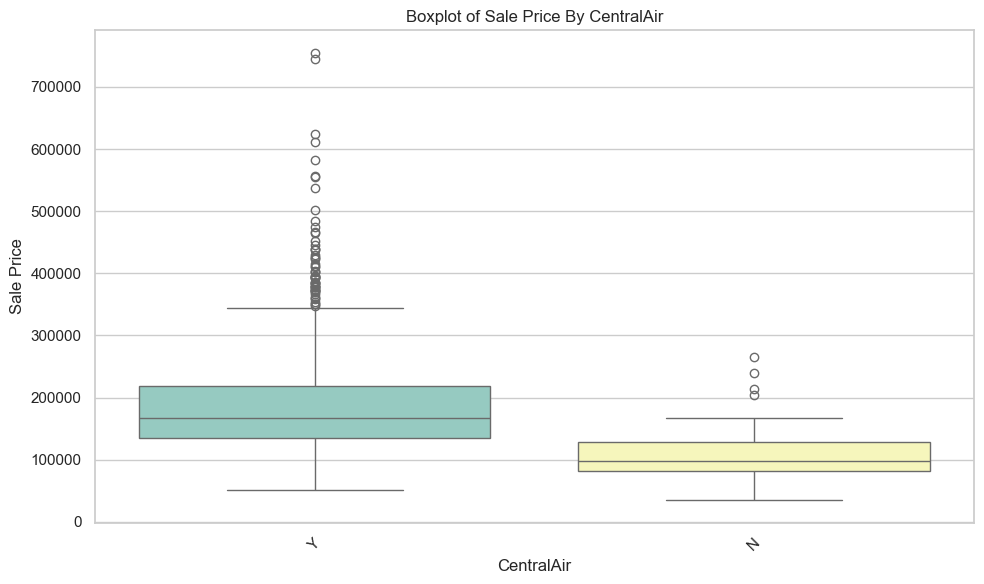

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


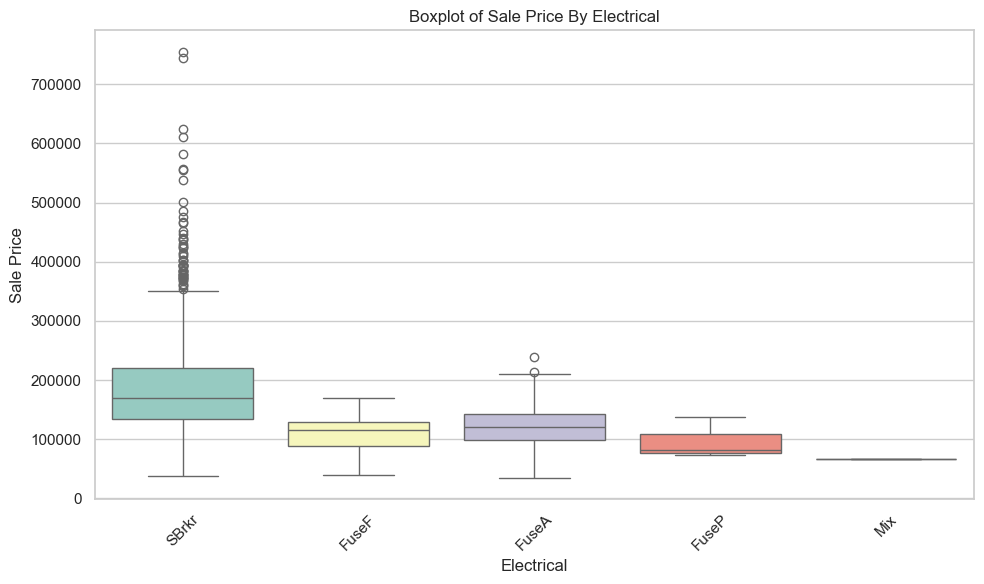

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


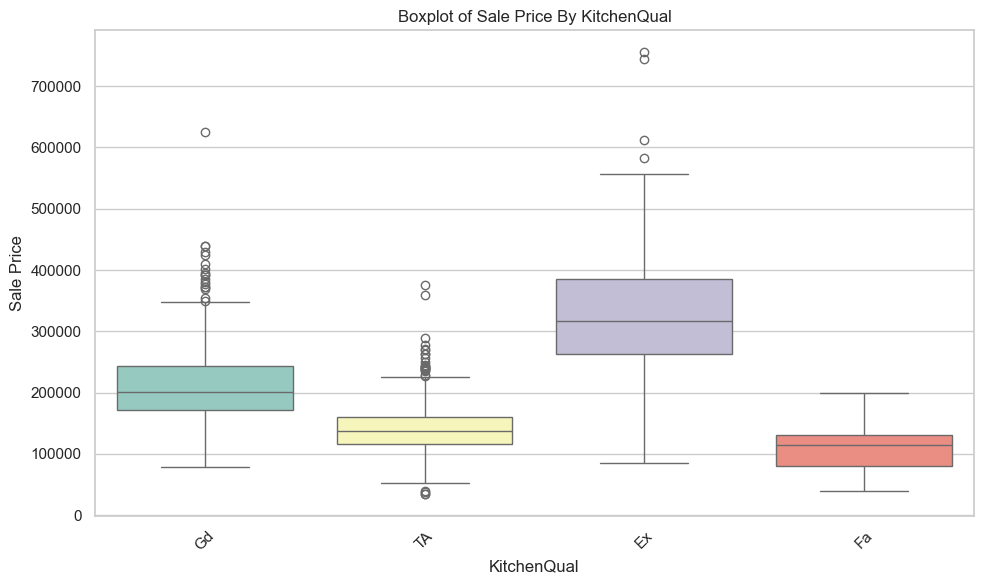

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


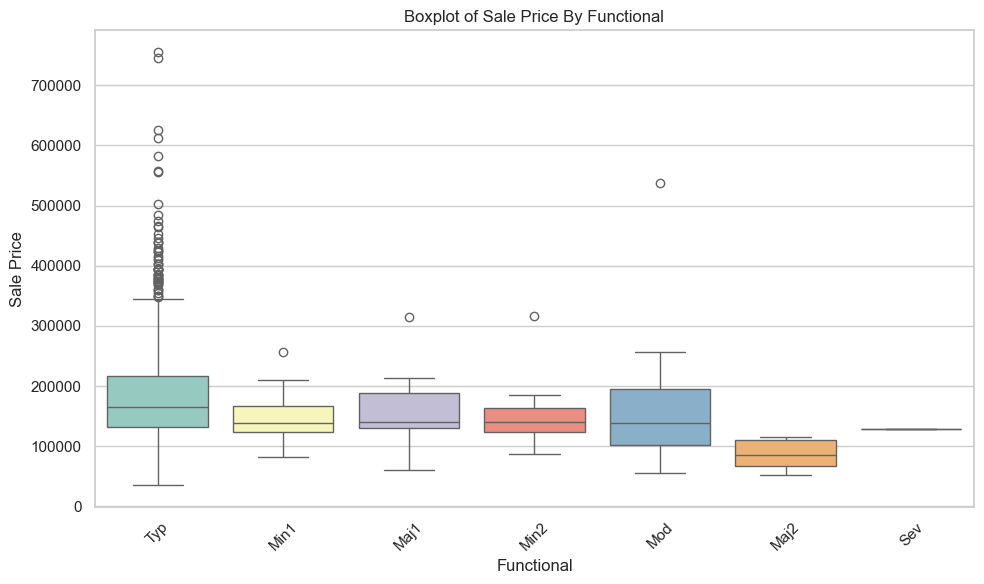

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


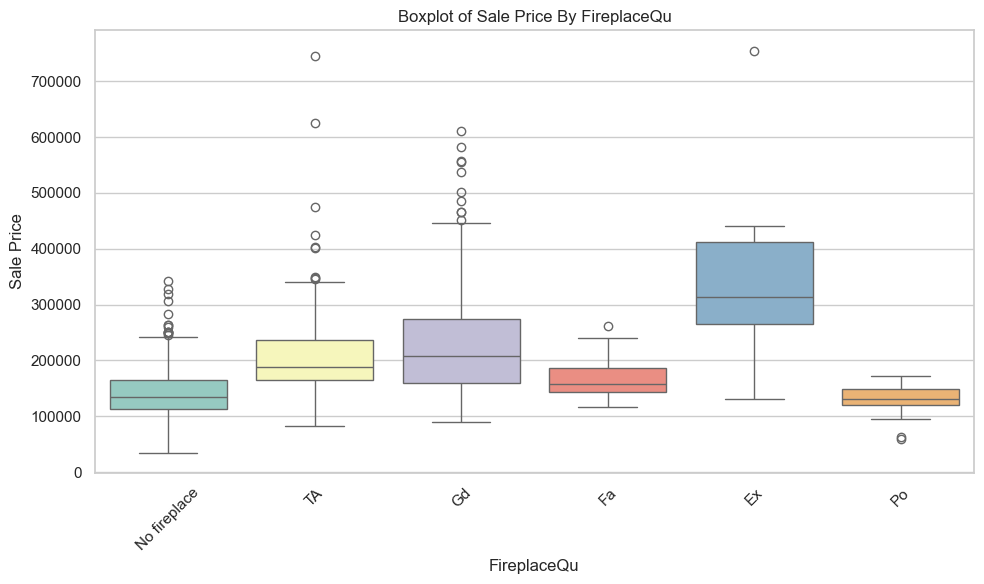

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


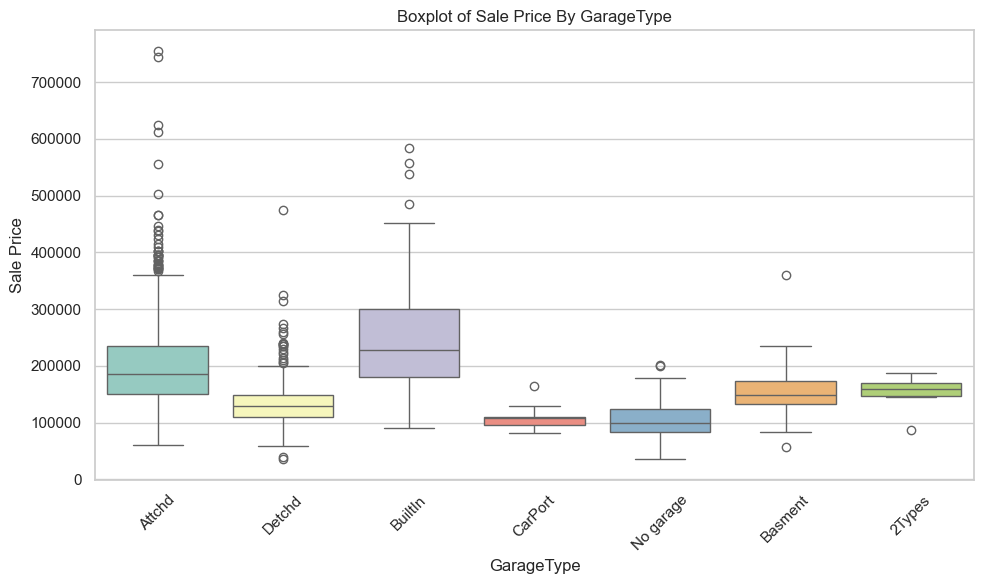

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


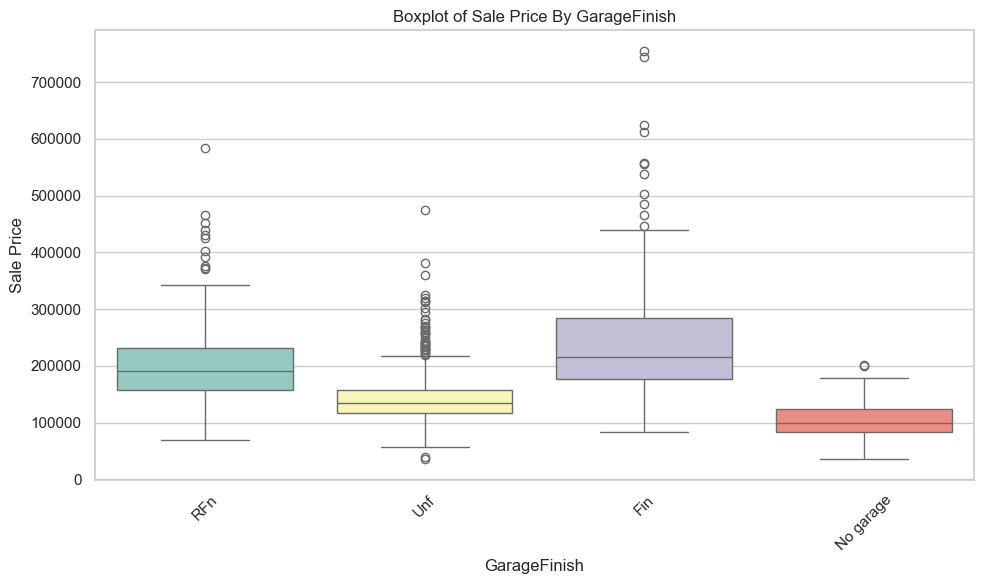

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


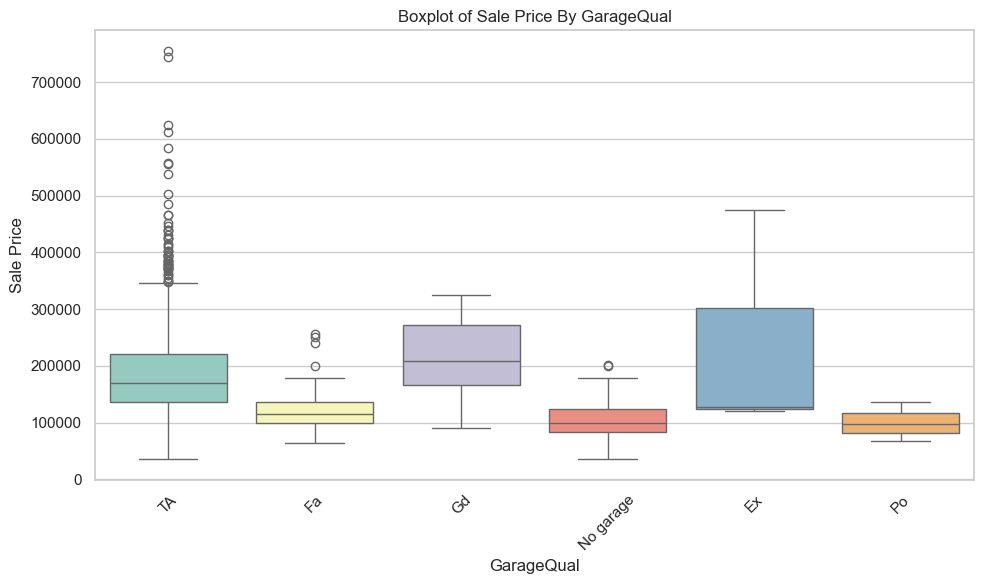

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


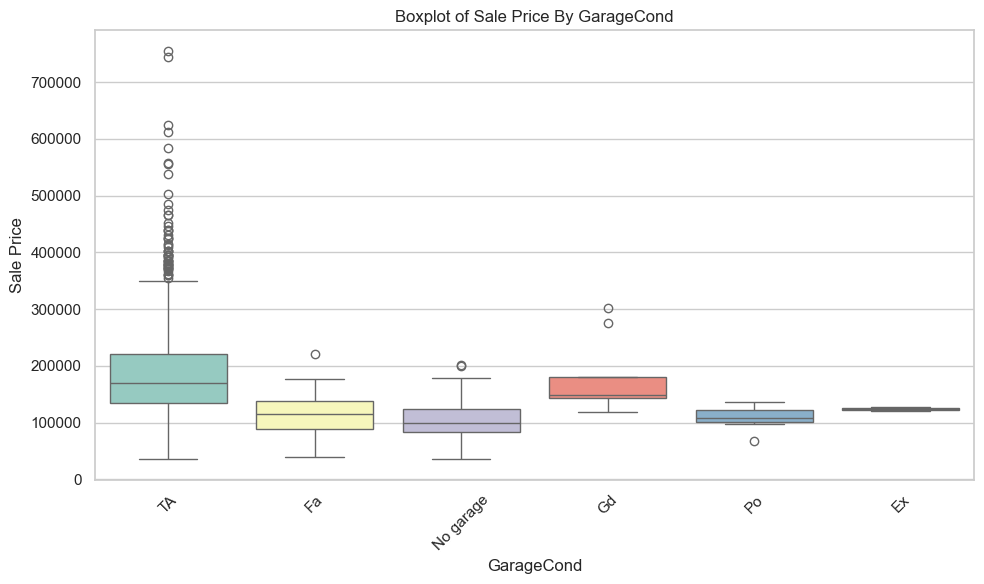

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


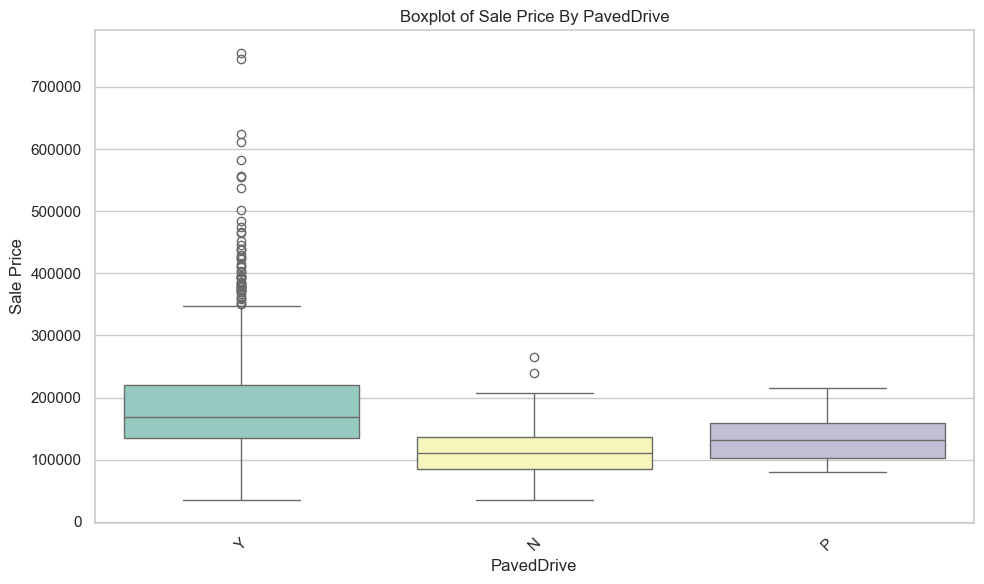

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


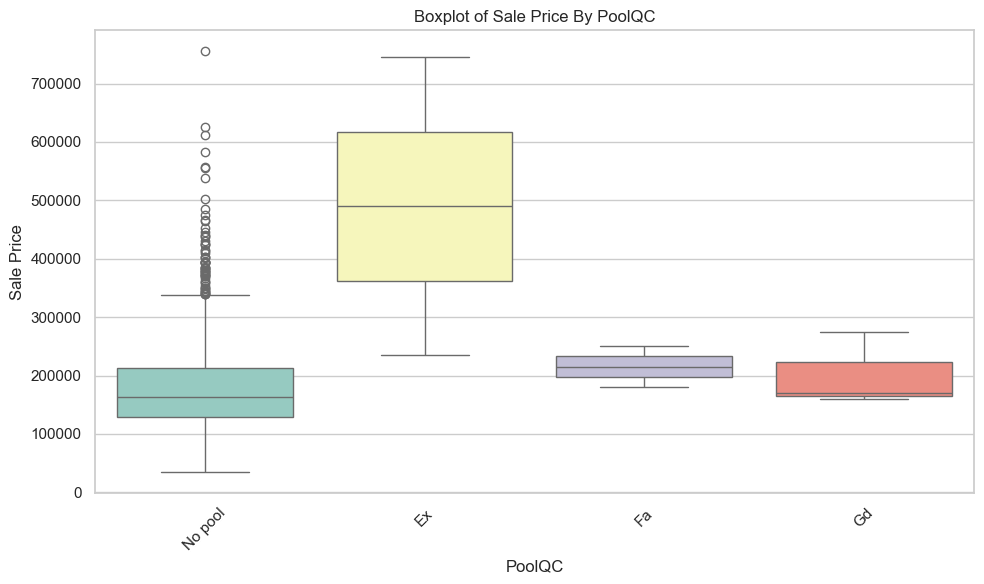

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


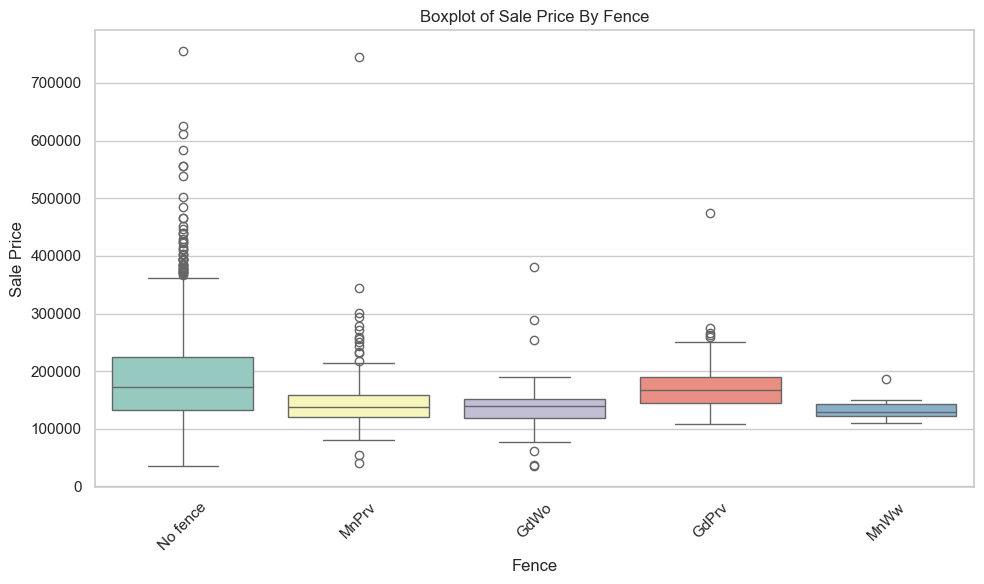

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


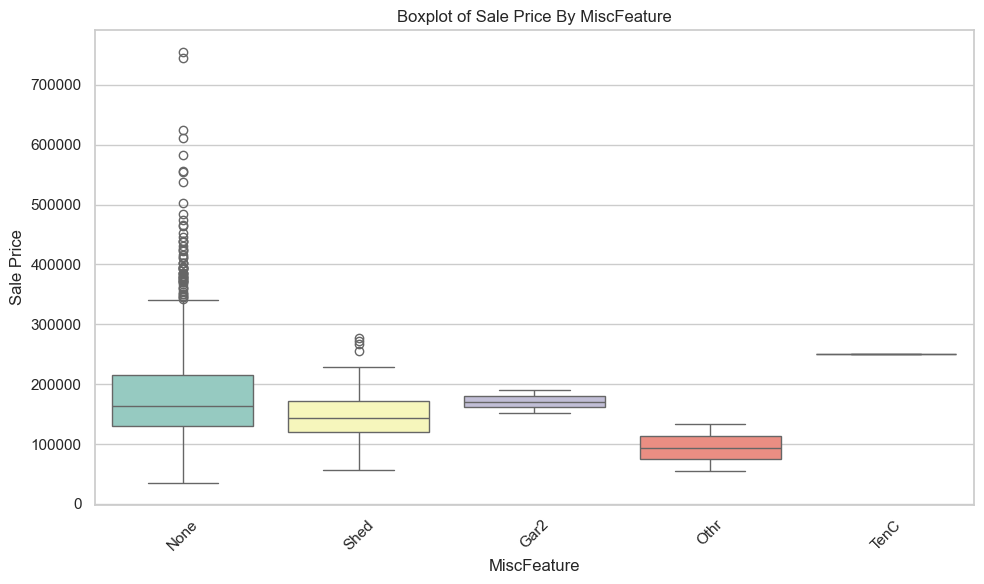

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


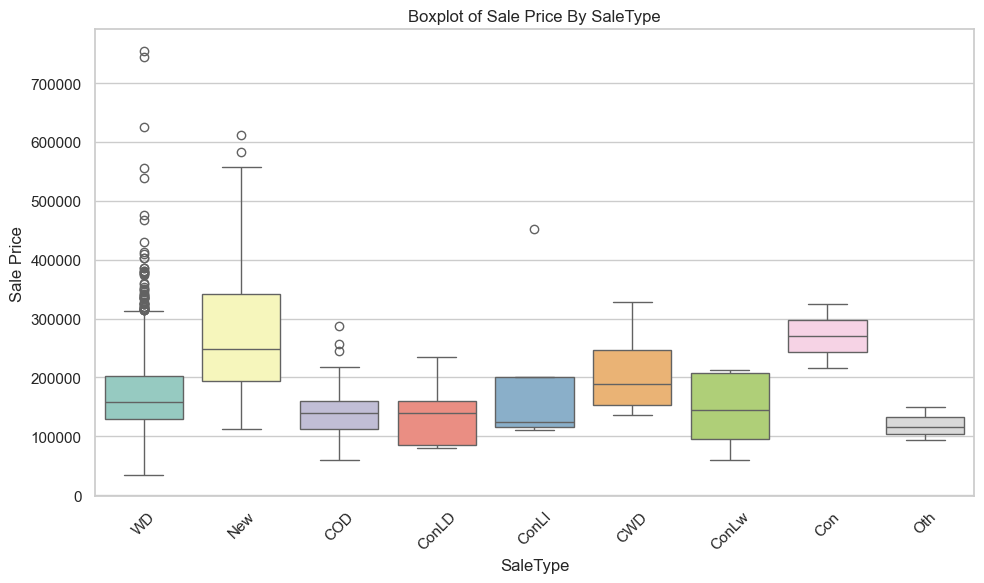

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/3112974927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')


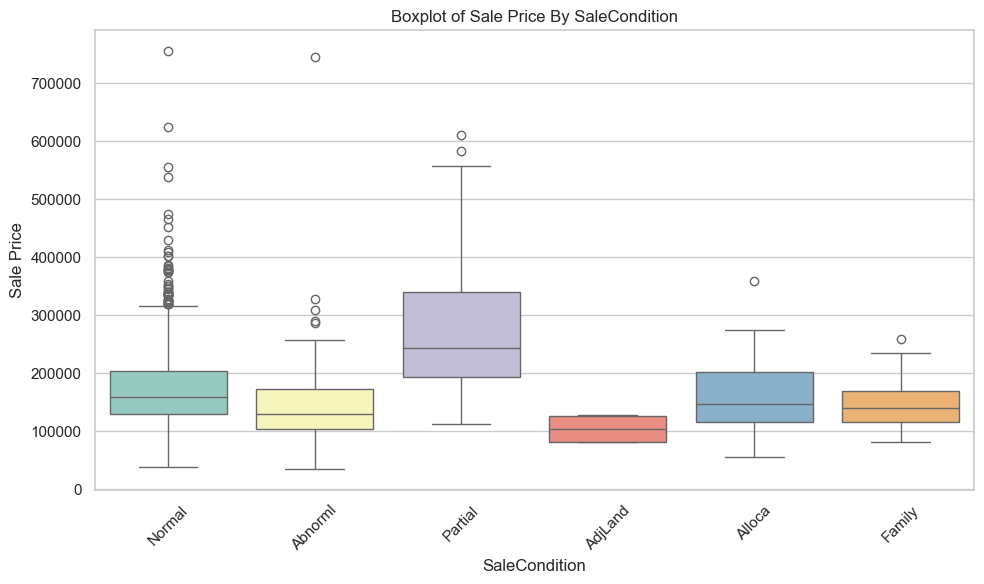

In [60]:
sns.set(style="whitegrid")

categorical_variables = df.select_dtypes(include=['object']).columns.tolist()

for variable in categorical_variables:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=variable, y='SalePrice', data=df, palette='Set3')
    plt.title(f'Boxplot of Sale Price By {variable}')
    plt.xlabel(f'{variable}')
    plt.ylabel('Sale Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [80]:
columns_nan = df.columns[df.isna().any()].tolist()

print(columns_nan)

['GarageYrBlt']


In [79]:
df['Electrical'].fillna('None', inplace=True)
df['LotFrontage'].fillna(0, inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/2934843500.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electrical'].fillna('None', inplace=True)
/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_81877/2934843500.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 